Paquetes necesarios

In [1]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

TAREA: Crea una imagen, p.e. de 800x800 píxeles, con la textura del tablero de ajedrez

Tablero de Ajedrez

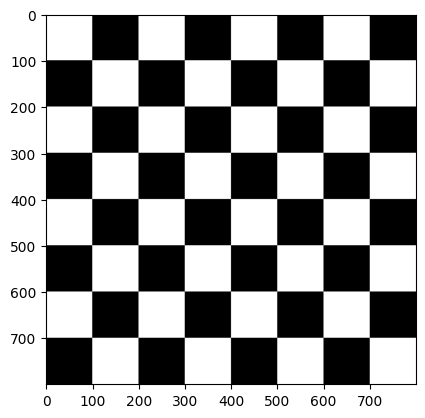

In [11]:
alto=800
ancho=800

#Crea una imagen con tres planos
color_img = np.zeros((alto,ancho,3), dtype = np.uint8)

#crear tablero de ajedrez

cont=0
x=0
y=0
while True:
    color_img[y:y+100,x:x+100] = 255

    if cont==8:
        break

    x+=200

    if x==800 or x==900:
        y+=100
        cont+=1
        if cont%2 == 1:
            x=100
        else:
            x=0


plt.imshow(color_img) 
plt.show()


TAREA: Crear una imagen estilo Mondrian (un ejemplo https://www3.gobiernodecanarias.org/medusa/ecoescuela/sa/2017/04/17/descubriendo-a-mondrian/ )

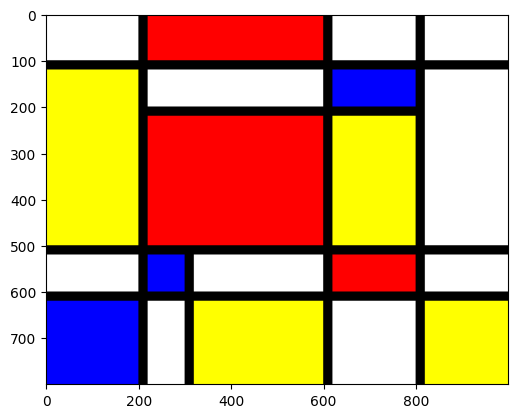

In [46]:
alto=800
ancho=1000

#Crea una imagen con tres planos
mondrian = np.zeros((alto,ancho,3), dtype = np.uint8)

#pintar fondo de blanco
mondrian[:,:] = 255

#pintar amarillo
mondrian[200:500,600:800, 2] = 0
mondrian[100:500,0:200, 2] = 0
mondrian[600:800,300:600, 2] = 0
mondrian[600:800,800:1000, 2] = 0

#pintar rojo
mondrian[0:100,200:600, 1:3] = 0
mondrian[200:500,200:600, 1:3] = 0
mondrian[500:600,600:800, 1:3] = 0

#pintar azul
mondrian[600:800,0:200,0:2] = 0
mondrian[100:200,600:800,0:2] = 0
mondrian[500:600,200:300,0:2] = 0

#lineas negras divisorias largas
    #verticales
mondrian[:,200:220] = 0
mondrian[:,600:620] = 0
mondrian[:,800:820] = 0
    #horizontales
mondrian[500:520,:] = 0
mondrian[100:120,:] = 0
mondrian[600:620,:] = 0

#lineas negras cortas
mondrian[500:800,300:320] = 0
mondrian[200:220,200:800] = 0

plt.imshow(mondrian) 
plt.show()

TAREA: Resuelve una de las tareas previas (a elegir) con las funciones de dibujo de OpenCV  :)

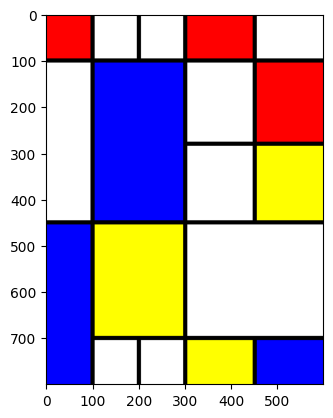

True

In [3]:
img = np.zeros((800,600,3), np.uint8)
cv2.rectangle(img,(0,0),(600,800),(255,255,255),-1)


cv2.rectangle(img,(0,0),(100,100),(255,0,0),-1)
cv2.rectangle(img,(100,100),(300,450),(0,0,255),-1)
cv2.rectangle(img,(450,700),(600,800),(0,0,255),-1)
cv2.rectangle(img,(300,700),(450,800),(255,255,0),-1)
cv2.rectangle(img,(100,450),(300,700),(255,255,0),-1)
cv2.rectangle(img,(450,100),(600,280),(255,0,0),-1)
cv2.rectangle(img,(450,280),(600,450),(255,255,0),-1)
cv2.rectangle(img,(0,450),(100,800),(0,0,255),-1)
cv2.rectangle(img,(300,0),(450,100),(255,0,0),-1)

cv2.line(img,(100,0),(100,800),(0,0,0),8)
cv2.line(img,(300,0),(300,800),(0,0,0),8)
cv2.line(img,(200,0),(200,100),(0,0,0),8)
cv2.line(img,(200,700),(200,800),(0,0,0),8)
cv2.line(img,(450,0),(450,450),(0,0,0),8)
cv2.line(img,(450,700),(450,800),(0,0,0),8)

cv2.line(img,(0,100),(600,100),(0,0,0),8)
cv2.line(img,(300,280),(600,280),(0,0,0),8)
cv2.line(img,(0,450),(600,450),(0,0,0),8)
cv2.line(img,(100,700),(600,700),(0,0,0),8)

plt.imshow(img) 
plt.show()

#Salva la imagen resultante a disco
cv2.imwrite('Mondrian.jpg', img)

TAREA: Modifica de forma libre los valores de un plano de la imagen

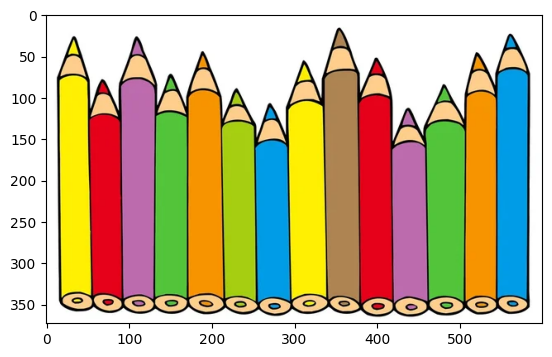

Sin plano rojo


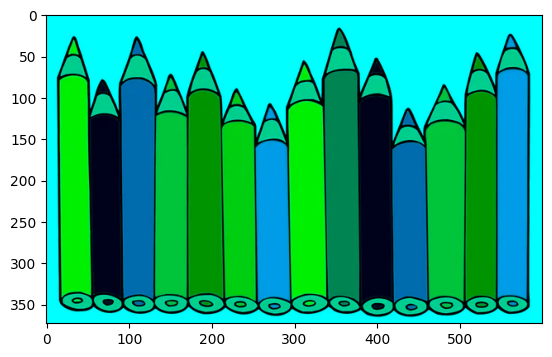

Con el plano rojo de cada pixel a 255


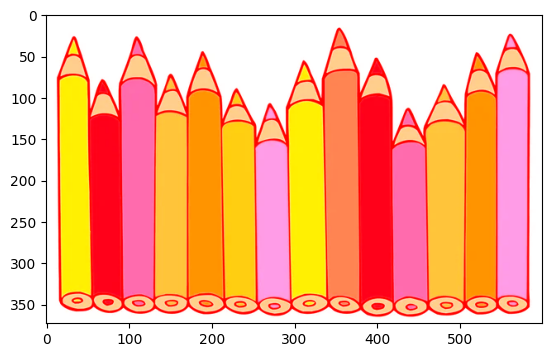

Con el plano rojo a la mitad


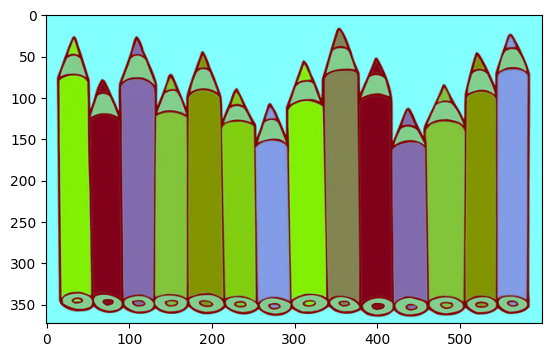

In [47]:
img2 = cv2.imread('lapicesColores.jpg') 

#imagen sin modificar
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img2_rgb) 
plt.show()

print("Sin plano rojo")
img2_rgb[:,:,0]=0
plt.imshow(img2_rgb) 
plt.show()

print("Con el plano rojo de cada pixel a 255")
img2_rgb[:,:,0]=255
plt.imshow(img2_rgb) 
plt.show()

print("Con el plano rojo a la mitad")
img2_rgb[:,:,0]=130
plt.imshow(img2_rgb) 
plt.show()

TAREA:
Pintar círculos en las posiciones del píxel más claro y oscuro de la imagen 
¿Si quisieras hacerlo sobre la zona 8x8 más clara/oscura?

In [4]:
# Cargar la imagen en color
img = cv2.imread('random-image.jpg')

# Convertir la imagen a escala de grises para calcular las intensidades más fácilmente
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Tamaño del bloque 8x8
block_size = 8

# Dimensiones de la imagen
height, width = gray_img.shape
print(gray_img.shape)

# Variables para almacenar los promedios de intensidad y las posiciones centrales de los bloques más claros y oscuros
max_avg_intensity = -1
min_avg_intensity = 256
max_block_pos = (0, 0)
min_block_pos = (0, 0)

# Recorre la imagen en bloques de tamaño block_size (en este caso 8x8)
for i in range(0, height - block_size + 1, block_size):
    for j in range(0, width - block_size + 1, block_size):
        
        # Extraer el bloque 8x8
        block = gray_img[i:i+block_size, j:j+block_size]
        
        # Calcula el promedio de intensidad del bloque
        avg_intensity = np.mean(block)
        
        # Si es el bloque más claro guarda su valor de intensidad y la posición central del bloque 
        if avg_intensity > max_avg_intensity:
            max_avg_intensity = avg_intensity
            max_block_pos = (j + block_size // 2, i + block_size // 2)
        
        # Si es el bloque más oscuro guarda su valor de intensidad y la posición central del bloque 
        if avg_intensity < min_avg_intensity:
            min_avg_intensity = avg_intensity
            min_block_pos = (j + block_size // 2, i + block_size // 2)

# Dibujar un círculo sobre el centro del bloque más claro (en la imagen a color)

cv2.circle(img, max_block_pos, block_size // 2, (255, 0, 0), 2)  # Círculo azul

# Dibujar un círculo sobre el centro del bloque más oscuro (en la imagen a color)

cv2.circle(img, min_block_pos, block_size // 2, (0, 0, 255), 2)  # Círculo rojo
cv2.imshow('Imagen en color con circulos', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

(400, 800)


TAREA: Llevar a cabo una propuesta propia de pop art

In [39]:
img = np.zeros((500,500,3), np.uint8)
cv2.rectangle(img,(0,0),(1050,1050),(255,255,255),-1)

astronaut_cat = cv2.imread("astronaut-cat.jpg")

astronaut_cat_resized = cv2.resize(astronaut_cat, (250,250), interpolation=cv2.INTER_LINEAR)

cat_1 = np.copy(astronaut_cat_resized)
cat_2 = np.copy(astronaut_cat_resized)
cat_3 = np.copy(astronaut_cat_resized)
cat_4 = np.copy(astronaut_cat_resized)


def create_triangle_mask1(height, width):
    mask = np.zeros((height, width), dtype=np.uint8)
    pts = np.array([[0, 0], [width, 0], [0, height]], np.int32)
    cv2.fillConvexPoly(mask, pts, 255)
    return mask

def create_triangle_mask2(height, width):
    mask = np.zeros((height, width), dtype=np.uint8)
    pts = np.array([[0, 0], [width, 0], [width, height]], np.int32)
    cv2.fillConvexPoly(mask, pts, 255)
    return mask

def create_triangle_mask3(height, width):
    mask = np.zeros((height, width), dtype=np.uint8)
    pts = np.array([[width, height], [0, width], [0, 0]], np.int32)
    cv2.fillConvexPoly(mask, pts, 255)
    return mask

def create_triangle_mask4(height, width):
    mask = np.zeros((height, width), dtype=np.uint8)
    pts = np.array([[height, 0], [0, height], [width, height]], np.int32)
    cv2.fillConvexPoly(mask, pts, 255)
    return mask


def apply_triangle_mask(image, mask, channel, value):
    image[:, :, channel] = np.where(mask == 255, value, image[:, :, channel])


triangle_mask1 = create_triangle_mask1(250, 250)
triangle_mask2 = create_triangle_mask2(250, 250)
triangle_mask3 = create_triangle_mask3(250, 250)
triangle_mask4 = create_triangle_mask4(250, 250)

apply_triangle_mask(cat_1, triangle_mask1, 2, 40)
apply_triangle_mask(cat_2, triangle_mask2, 1, 0)
apply_triangle_mask(cat_3, triangle_mask3, 0, 50)
apply_triangle_mask(cat_4, triangle_mask4, 2, 100)

img[0:250, 0:250] = cat_1
img[0:250, 250:500] = cat_2
img[250:500, 0:250] = cat_3
img[250:500, 250:500] = cat_4



cv2.imshow('Gato Astronauta', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [48]:
perro = cv2.imread('perro.jpg') 

h, w, c = perro.shape
"""
up_left=perro
up_left[:,:,0]=0

up_mid=perro
up_mid[:,:,1]=0

up_right=perro
up_right[:,:,2]=0

perro = np.hstack((up_left, up_mid, up_right))
"""
    
cv2.imshow('RGB', cv2.resize(perro, (int(w*1.5),int(h/2)),cv2.INTER_NEAREST))
cv2.waitKey(-1)
cv2.destroyAllWindows()